In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
import itertools
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
%matplotlib inline

In [3]:
movies = pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# 新增區段

In [4]:
ratings = pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
ratings_title = pd.merge(ratings, movies[['movieId', 'genres']], on='movieId' )
user_movie_ratings = pd.pivot_table(ratings_title, index='userId', columns= 'genres', values='rating')

print('資料集大小: ', user_movie_ratings.shape)
user_movie_ratings.iloc[0:10, 0:15]

資料集大小:  (610, 951)


genres,(no genres listed),Action,Action|Adventure,Action|Adventure|Animation,Action|Adventure|Animation|Children,Action|Adventure|Animation|Children|Comedy,Action|Adventure|Animation|Children|Comedy|Fantasy,Action|Adventure|Animation|Children|Comedy|IMAX,Action|Adventure|Animation|Children|Comedy|Romance,Action|Adventure|Animation|Children|Comedy|Sci-Fi,Action|Adventure|Animation|Children|Comedy|Sci-Fi|IMAX,Action|Adventure|Animation|Children|Comedy|Western,Action|Adventure|Animation|Children|Fantasy,Action|Adventure|Animation|Children|Fantasy|Sci-Fi,Action|Adventure|Animation|Children|Sci-Fi
userId,,,,,,,,,,,,,,,
1,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
user_movie_ratings = pd.pivot_table(ratings, index='userId', columns= 'movieId', values='rating')

print('資料集大小: ', user_movie_ratings.shape)
user_movie_ratings.iloc[0:10, 0:15]

資料集大小:  (610, 9724)


movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
userId,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,4.0,5.0,3.0,5.0,4.0,4.0,3.0,NaN,3.0,4.0,NaN,3.0,NaN,4.0
7,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#user_movie_ratings.isnull().sum()

new = pd.DataFrame()
a=0
for i in range(len(user_movie_ratings.columns)):
    m=i+1
    rc=user_movie_ratings.iloc[:,i].notnull().sum()
    ra=round(user_movie_ratings.iloc[:,i].sum()/rc,2)
    new= new.append({"movieId":m,'rankcount':rc,'rankavg':ra},ignore_index=True)
new

,movieId,rankavg,rankcount
0,1.0,3.92,215.0
1,2.0,3.43,110.0
2,3.0,3.26,52.0
3,4.0,2.36,7.0
4,5.0,3.07,49.0
...,...,...,...
9719,9720.0,4.00,1.0
9720,9721.0,3.50,1.0
9721,9722.0,3.50,1.0
9722,9723.0,3.50,1.0


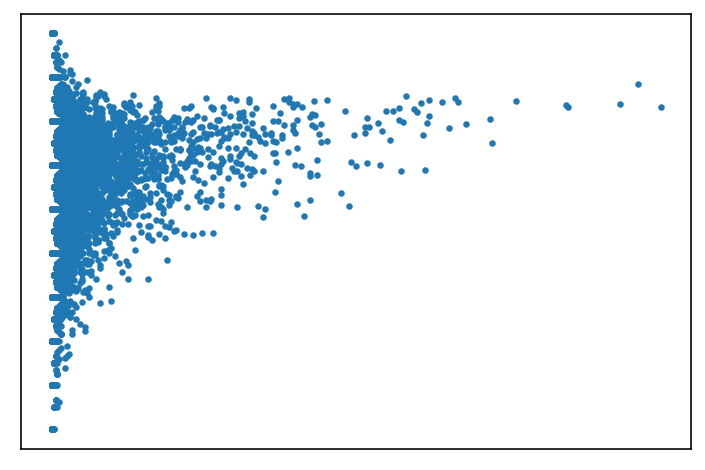

In [17]:
plt.figure(figsize=(6,4), dpi=144)
plt.xticks(())
plt.yticks(())
plt.scatter(new['rankcount'], new['rankavg'], s=5, marker='o');


In [9]:
new=new.drop(['movieId'],axis=1)

In [18]:
#採用sklearn內建kmeans函數
from sklearn.cluster import KMeans
#訓練資料集為4群
#故意設k值為3
n_clusters = 4
kmean = KMeans(n_clusters=n_clusters)
kmean.fit(new);
print("kmean: k={}, cost={}".format(n_clusters, int(kmean.score(new))))

kmean: k=4, cost=-512644


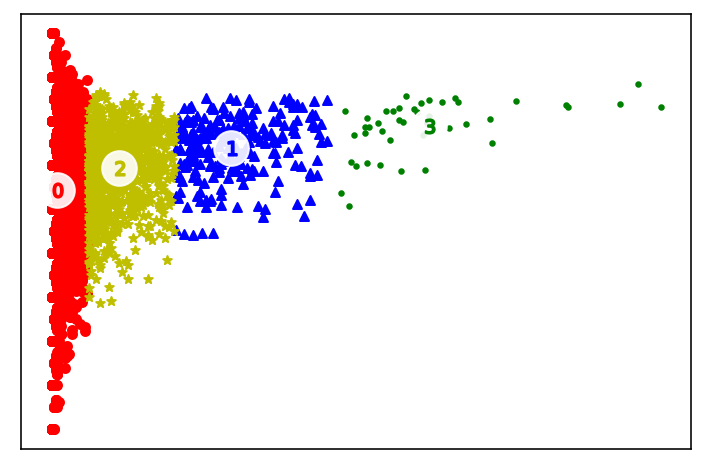

In [21]:
#取得分群結果
labels = kmean.labels_

#取得分群的中心點(質心)
centers = kmean.cluster_centers_

#定義繪圖顏色
markers = ['o', '^', '*','.']
colors = ['r', 'b', 'y','g']

plt.figure(figsize=(6,4), dpi=144)
plt.xticks(())
plt.yticks(())

#畫圖
for c in range(n_clusters):
  cluster = new[labels == c]
  plt.scatter(cluster['rankcount'], cluster['rankavg'],marker=markers[c], s=20, c=colors[c])
#畫質心
plt.scatter(centers[:, 1], centers[:, 0],
      marker='o', c="white", alpha=0.9, s=300)
for i, c in enumerate(centers):
  plt.scatter(c[1], c[0], marker='$%d$' % i, s=50, c=colors[i])

In [23]:
print(centers)

[[  3.22416068   4.02615149]
 [  3.6979386   97.57017544]
 [  3.46636929  36.95850622]
 [  3.94418605 204.27906977]]


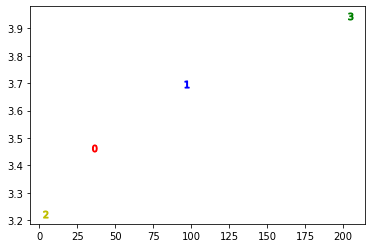

In [19]:
#畫質心
plt.scatter(centers[:, 1], centers[:, 0],
      marker='o', c="white", alpha=0.9, s=300)
for i, c in enumerate(centers):
  plt.scatter(c[1], c[0], marker='$%d$' % i, s=50, c=colors[i])

In [13]:
centers

array([[  3.46227898,  35.68958743],
       [  3.69669492,  96.53389831],
       [  3.22268779,   3.90862703],
       [  3.94418605, 204.27906977]])

In [24]:
#分群畫圖函數
def fit_plot_kmean_model(n_clusters, X):
    plt.xticks(())
    plt.yticks(())

    #設定k值
    kmean = KMeans(n_clusters=n_clusters)
    kmean.fit_predict(new)

    labels = kmean.labels_
    centers = kmean.cluster_centers_
    markers = ['o', '^', '*', 's']
    colors = ['r', 'b', 'y', 'k']

    #調用sklearn內建的模型分數
    #該值越大越好
    score = kmean.score(new)
    plt.title("k={}, score={}".format(n_clusters, (int)(score)))

    #畫圖
    for c in range(n_clusters):
        cluster = new[labels == c]
        plt.scatter(cluster['rankcount'], cluster['rankavg'], 
                    marker=markers[c], s=20, c=colors[c])
    #畫質心
    #plt.scatter(centers[:, 0], centers[:, 1],
    #            marker='o', c="white", alpha=0.9, s=300)
    #for i, c in enumerate(centers):
    #    plt.scatter(c[0], c[1], marker='$%d$' % i, s=50, c=colors[i])

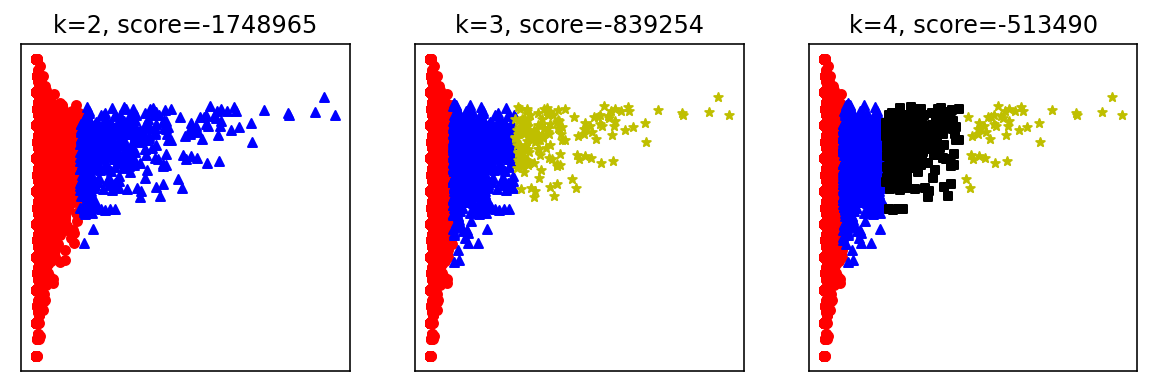

In [28]:
from sklearn.cluster import KMeans

#特別定義K值
n_clusters = [2, 3, 4]

plt.figure(figsize=(10, 3), dpi=144)
for i, c in enumerate(n_clusters):
    plt.subplot(1, 3, i + 1)
    fit_plot_kmean_model(c, new)
    
#果然k值為4模型分數最高

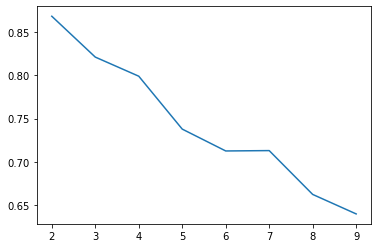

In [26]:
#透過輪廓係數
from sklearn.metrics import silhouette_score

silhouette_avg = []
for i in range(2,10):
    kmeans_fit = KMeans(n_clusters = i).fit(new)
    silhouette_avg.append(silhouette_score(new, kmeans_fit.labels_))
    
plt.plot(range(2,10), silhouette_avg)